### Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers

### About the dataset (Predict Loan Eligibility for Dream Housing Finance company) 

**Loan_ID** Unique Loan ID

**Gender** Male/ Female

**Married** Applicant married (Y/N)

**Dependents** Number of dependents

**Education** Applicant Education (Graduate/ Under Graduate)

**Self_Employed** Self employed (Y/N)

**ApplicantIncome** Applicant income

**CoapplicantIncome** Coapplicant income

**LoanAmount** Loan amount in thousands

**Loan_Amount_Term** Term of loan in months

**Credit_History** credit history meets guidelines

**Property_Area** Urban/ Semi Urban/ Rural

**Loan_Status** (Target) Loan approved (Y/N)

# 1. Importing Libraries 

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PowerTransformer

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, f1_score, recall_score, auc
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# import function to perform feature selection
from sklearn.feature_selection import RFE

### set the plot size using 'rcParams'

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

# 2. Data Preparation

## 2.1 Read the data 

In [3]:
df_train = pd.read_csv('train_data.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


Gender and Married columns are not significant for our model so we can drop them from our train and test data

In [4]:
df_train.drop(df_train[['Loan_ID']],axis=1, inplace=True)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [5]:
df_test = pd.read_csv('test_data.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.000000,360.000000,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.000000,360.000000,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.000000,360.000000,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.000000,360.000000,nan,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.000000,360.000000,1.000000,Urban


In [6]:
df_test1 = df_test.drop(df_test[['Loan_ID']],axis=1)
df_test1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.000000,360.000000,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.000000,360.000000,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.000000,360.000000,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.000000,360.000000,nan,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.000000,360.000000,1.000000,Urban


In [7]:
print('Shape of Train data ',df_train.shape)
print('Shape of test data ',df_test1.shape)

Shape of Train data  (614, 12)
Shape of test data  (367, 11)


The train data has 614 rows and 11 columns

The test data has 367 rows and 10 columns

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Train data has 8 categorical and 5 continious variables.

In [9]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


Test data has 5 categorical and 5 continious variables.

## 2.2 Checking missing values

In [10]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_train.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data_train = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data_train

,Total,Percentage of Missing Values
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


For the columns that require it, missing values are imputed using the median and mode.

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_test1.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_test1.isnull().sum()*100/df_test.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data_test = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data_test

,Total,Percentage of Missing Values
Credit_History,29.000000,7.901907
Self_Employed,23.000000,6.267030
Gender,11.000000,2.997275
Dependents,10.000000,2.724796
Loan_Amount_Term,6.000000,1.634877
LoanAmount,5.000000,1.362398
Property_Area,0.000000,0.000000
CoapplicantIncome,0.000000,0.000000
ApplicantIncome,0.000000,0.000000
Education,0.000000,0.000000


In [12]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df_train['Dependents'] = df_train['Dependents'].replace({'0' : '0 Dependents',
                                                        '1' : '1 Dependents',
                                                        '2' : '2 Dependents',
                                                        '3+' : '3+ Dependents'})

In [14]:
df_test1['Dependents'] = df_test['Dependents'].replace({'0' : '0 Dependents',
                                                        '1' : '1 Dependents',
                                                        '2' : '2 Dependents',
                                                        '3+' : '3+ Dependents'})

In [15]:
df_train['Dependents'].value_counts()

0 Dependents     345
1 Dependents     102
2 Dependents     101
3+ Dependents     51
Name: Dependents, dtype: int64

In [16]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
df_train['Credit_History'].value_counts()

1.000000    475
0.000000     89
Name: Credit_History, dtype: int64

In [18]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [19]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [20]:
df_train['Gender'].fillna('Male',inplace=True)
df_test1['Gender'].fillna('Male',inplace=True)

df_train['Married'].fillna('Yes',inplace=True)
df_test1['Married'].fillna('Yes',inplace=True)


df_train['Credit_History'].fillna(1.000000,inplace=True)
df_test1['Credit_History'].fillna(1.000000,inplace=True)

df_train['Self_Employed'].fillna('No',inplace=True)
df_test1['Self_Employed'].fillna('No',inplace=True)

df_train['Dependents'].fillna('0 Dependents',inplace=True)
df_test1['Dependents'].fillna('0 Dependents',inplace=True)

df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())
df_test1['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())

df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median())
df_test1['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())

In [21]:
df_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [22]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df_test1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## 2.3 Distribution of Variables

**Distribution of numeric independent variables.**

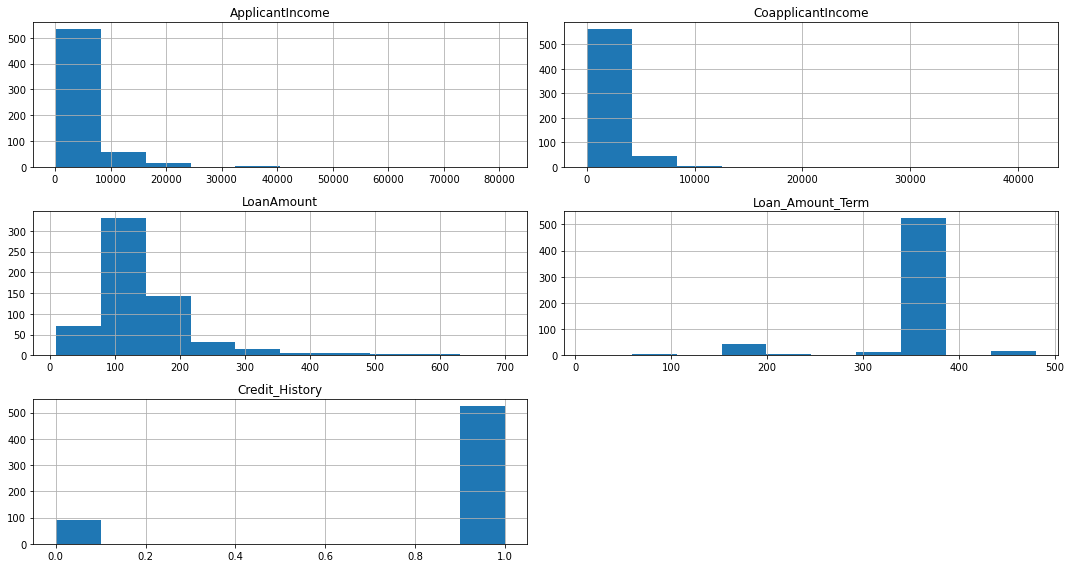

In [24]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_train.drop('Loan_Status', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

## 2.4 Checking for Outliers in the datasets 

ApplicantIncome


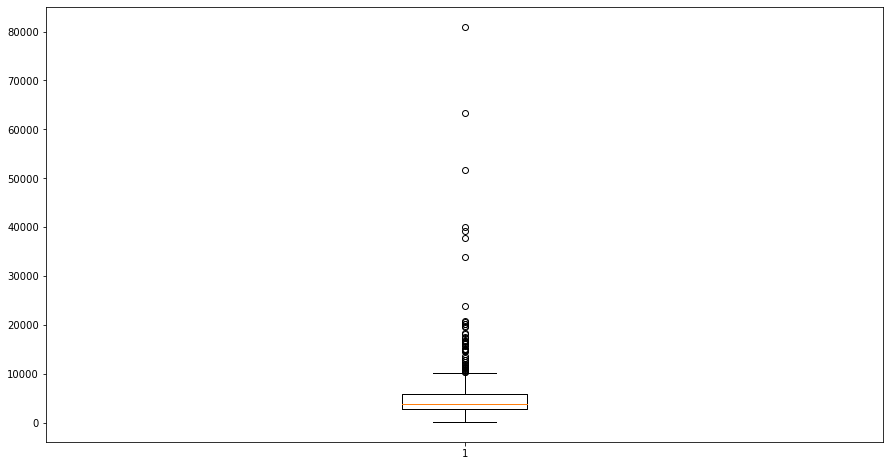

CoapplicantIncome


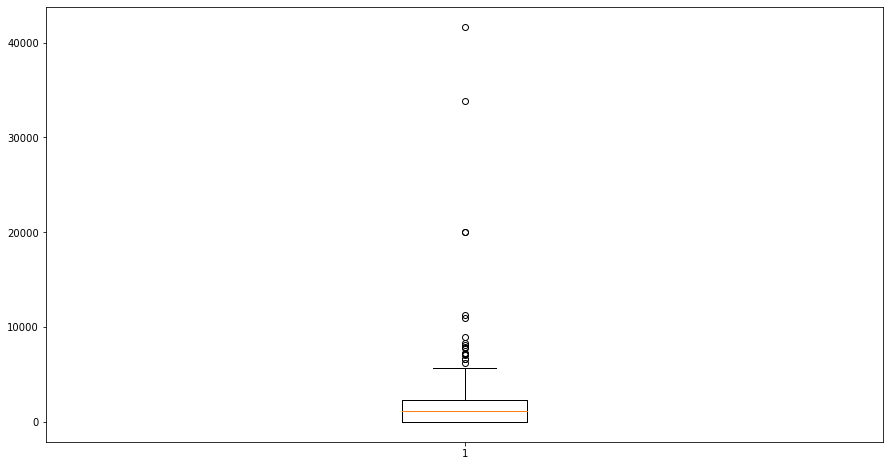

LoanAmount


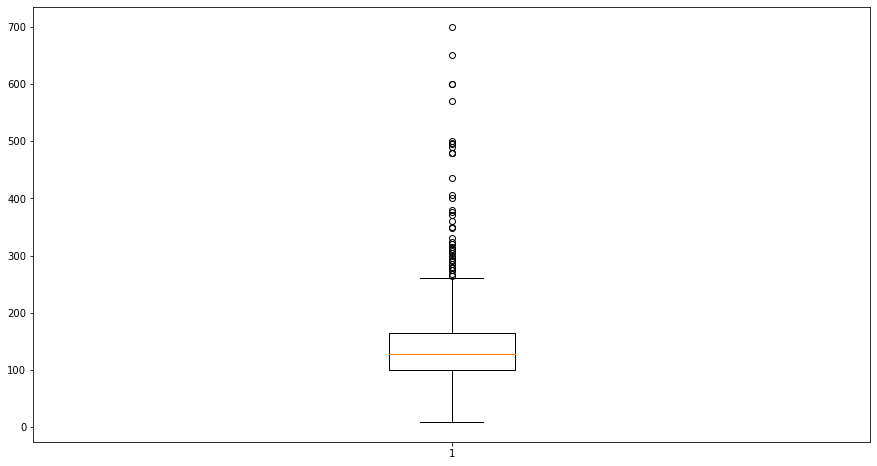

Loan_Amount_Term


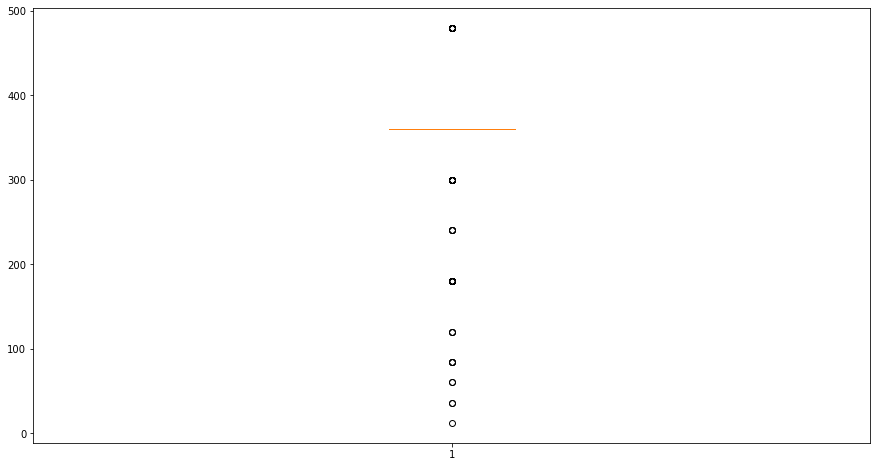

Credit_History


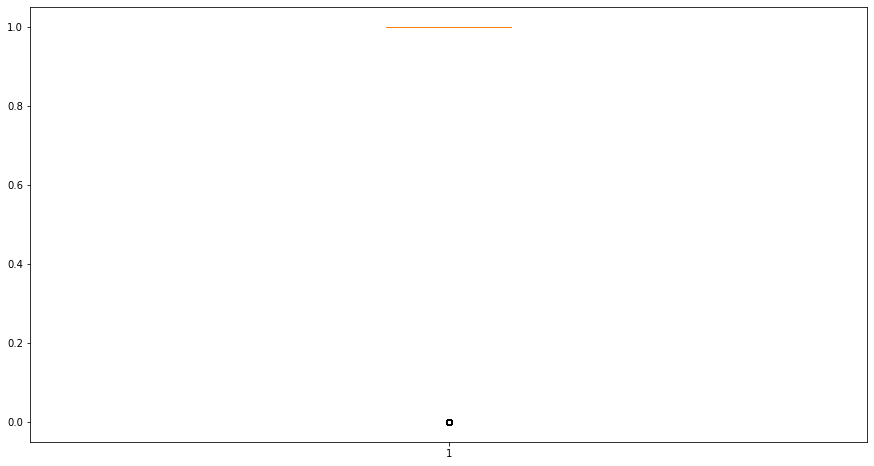

In [25]:
for i in df_train.select_dtypes(exclude='object').columns:
    print(i)
    plt.boxplot(df_train[i])
    plt.show()

## 2.5 Feature Engineering

**For Train dataset**

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Loan_Status'] = le.fit_transform(df_train['Loan_Status'])

In [27]:
df_train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [28]:
train_num = df_train.select_dtypes(exclude='object')
train_cat = df_train.select_dtypes(include='object')

In [29]:
dummy_var_train = pd.get_dummies(data = train_cat, drop_first=True)

In [30]:
dftrain = pd.concat([train_num,dummy_var_train],axis=1)
dftrain.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1 Dependents,Dependents_2 Dependents,Dependents_3+ Dependents,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.000000,128.000000,360.000000,1.000000,1,1,0,0,0,0,0,0,0,1
1,4583,1508.000000,128.000000,360.000000,1.000000,0,1,1,1,0,0,0,0,0,0
2,3000,0.000000,66.000000,360.000000,1.000000,1,1,1,0,0,0,0,1,0,1
3,2583,2358.000000,120.000000,360.000000,1.000000,1,1,1,0,0,0,1,0,0,1
4,6000,0.000000,141.000000,360.000000,1.000000,1,1,0,0,0,0,0,0,0,1


**For Test Dataset**

In [31]:
test_num = df_test1.select_dtypes(exclude='object')
test_cat = df_test1.select_dtypes(include='object')

In [32]:
dummy_var_test = pd.get_dummies(data = test_cat, drop_first=True)

In [33]:
dftest = pd.concat([test_num,dummy_var_test],axis=1)
dftest.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1 Dependents,Dependents_2 Dependents,Dependents_3+ Dependents,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.000000,360.000000,1.000000,1,1,0,0,0,0,0,0,1
1,3076,1500,126.000000,360.000000,1.000000,1,1,1,0,0,0,0,0,1
2,5000,1800,208.000000,360.000000,1.000000,1,1,0,1,0,0,0,0,1
3,2340,2546,100.000000,360.000000,1.000000,1,1,0,1,0,0,0,0,1
4,3276,0,78.000000,360.000000,1.000000,1,0,0,0,0,1,0,0,1


In [34]:
print('Train dataset rows and columns after feature engineering are',dftrain.shape)
print('Test dataser rows and columns after feature engineering are',dftest.shape)

Train dataset rows and columns after feature engineering are (614, 15)
Test dataser rows and columns after feature engineering are (367, 14)


**Checking datatypes of the columns**

In [35]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ApplicantIncome           614 non-null    int64  
 1   CoapplicantIncome         614 non-null    float64
 2   LoanAmount                614 non-null    float64
 3   Loan_Amount_Term          614 non-null    float64
 4   Credit_History            614 non-null    float64
 5   Loan_Status               614 non-null    int32  
 6   Gender_Male               614 non-null    uint8  
 7   Married_Yes               614 non-null    uint8  
 8   Dependents_1 Dependents   614 non-null    uint8  
 9   Dependents_2 Dependents   614 non-null    uint8  
 10  Dependents_3+ Dependents  614 non-null    uint8  
 11  Education_Not Graduate    614 non-null    uint8  
 12  Self_Employed_Yes         614 non-null    uint8  
 13  Property_Area_Semiurban   614 non-null    uint8  
 14  Property_A

In [36]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ApplicantIncome           367 non-null    int64  
 1   CoapplicantIncome         367 non-null    int64  
 2   LoanAmount                367 non-null    float64
 3   Loan_Amount_Term          367 non-null    float64
 4   Credit_History            367 non-null    float64
 5   Gender_Male               367 non-null    uint8  
 6   Married_Yes               367 non-null    uint8  
 7   Dependents_1 Dependents   367 non-null    uint8  
 8   Dependents_2 Dependents   367 non-null    uint8  
 9   Dependents_3+ Dependents  367 non-null    uint8  
 10  Education_Not Graduate    367 non-null    uint8  
 11  Self_Employed_Yes         367 non-null    uint8  
 12  Property_Area_Semiurban   367 non-null    uint8  
 13  Property_Area_Urban       367 non-null    uint8  
dtypes: float64

## 2.6 Train-Test Split

In [37]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x = dftrain.drop('Loan_Status',axis=1)
df_target = dftrain['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(x, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (491, 14)
y_train (491,)
X_test (123, 14)
y_test (123,)


## 2.7 Scale the data

In [38]:
pt=PowerTransformer()
pt.fit(x)       ## Fit the PT on training data
X  = pt.transform(x)
X = pd.DataFrame(X)
X.columns = x.columns
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1 Dependents,Dependents_2 Dependents,Dependents_3+ Dependents,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.544331,-1.102837,-0.025462,0.175540,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,0.170974,0.750578,-0.025462,0.175540,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.499955,-1.102837,-1.339826,0.175540,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.743873,0.891686,-0.155876,0.175540,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.582817,-1.102837,0.170931,0.175540,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


## 2.8 Train test split in scaled data

In [56]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x = X
df_target = dftrain['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(x, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (491, 14)
y_train (491,)
X_test (123, 14)
y_test (123,)


# 3. Decision Tree for Classification 

In [57]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = dt.fit(X_train, y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))
print(f1_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))

Training Accuracy
1.0
Testing Accuracy
0.7073170731707317
[[20 16]
 [20 67]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        36
           1       0.81      0.77      0.79        87

    accuracy                           0.71       123
   macro avg       0.65      0.66      0.66       123
weighted avg       0.72      0.71      0.71       123

[0.5        0.80722892]
[0.55555556 0.77011494]
0.6628352490421456
[0.52631579 0.78823529]
0.6628352490421456


## 3.1 Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [49]:
submission_df_for_dt['Loan_Status'].value_counts()

0    262
1    105
Name: Loan_Status, dtype: int64

In [116]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
dt = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = dt, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 7} 



## 3.2 Building Decision Tree model using tuned Hyperparameters

In [124]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)
print("Training Accuracy")
print(dt_model.score(X_train,y_train))
print("Testing Accuracy")
print(dt_model.score(X_test,y_test))
predicted = dt_model.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))
print(f1_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))

Training Accuracy
0.8228105906313645
Testing Accuracy
0.7886178861788617
[[12 24]
 [ 2 85]]
              precision    recall  f1-score   support

           0       0.86      0.33      0.48        36
           1       0.78      0.98      0.87        87

    accuracy                           0.79       123
   macro avg       0.82      0.66      0.67       123
weighted avg       0.80      0.79      0.75       123

[0.85714286 0.77981651]
[0.33333333 0.97701149]
0.6551724137931034
[0.48       0.86734694]
0.6551724137931034


**Roc Curve for Decision Tree**

In [126]:
pred_probab = dt_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, pred_probab[:,1])
roc_auc = auc(fpr,tpr)
print('The area under the receiver operating characteristic curve is', roc_auc)

The area under the receiver operating characteristic curve is 0.6949233716475096


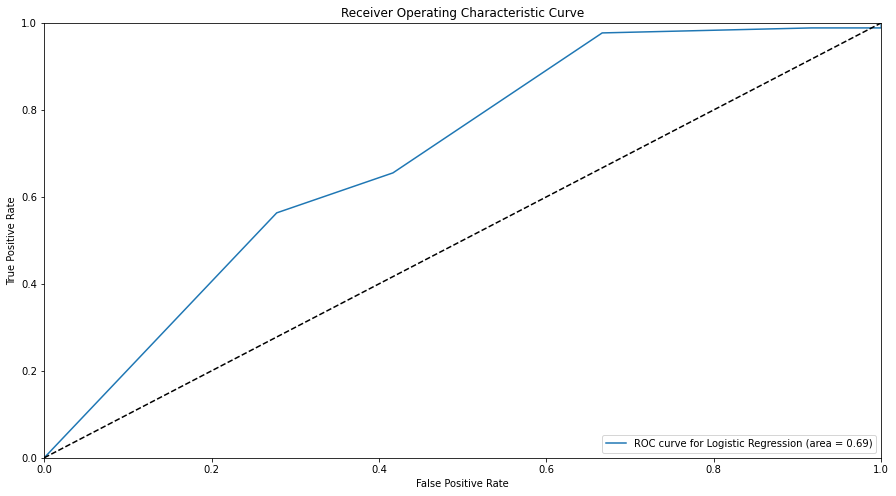

In [127]:
plt.rcParams['figure.figsize'] = [15,8]
plt.clf()
plt.plot(fpr, tpr, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

## 3.4 DT Prediction

In [118]:
test_predictions_for_dt = dt_model.predict(dftest)

In [119]:
Loan_ID = df_test['Loan_ID']
submission_df_for_dt = pd.DataFrame({
                  "Loan_ID": Loan_ID, 
                  "Loan_Status": test_predictions_for_dt})

In [120]:
submission_df_for_dt['Loan_Status'].value_counts()

0    211
1    156
Name: Loan_Status, dtype: int64

In [121]:
submission_df_for_dt['Loan_Status'].replace({1:'Y',
                                             0:'N'},inplace=True)

In [122]:
submission_df_for_dt.to_csv('submission_with_tune_parameters_in_DT.csv', index=False)

# 4. Random Forest for Classification

In [128]:
forest = RandomForestClassifier(random_state=10)
forest.fit(X_train,y_train)
print("Training Accuracy")
print(forest.score(X_train,y_train))
print("Testing Accuracy")
print(forest.score(X_test,y_test))
predicted = forest.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))
print(f1_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))

Training Accuracy
1.0
Testing Accuracy
0.7804878048780488
[[14 22]
 [ 5 82]]
              precision    recall  f1-score   support

           0       0.74      0.39      0.51        36
           1       0.79      0.94      0.86        87

    accuracy                           0.78       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.77      0.78      0.76       123

[0.73684211 0.78846154]
[0.38888889 0.94252874]
0.6657088122605364
[0.50909091 0.85863874]
0.6657088122605364


## 4.2 Building Random Forest model using tuned Hyperparameters

In [129]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 30} 



In [130]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)
print("Training Accuracy")
print(rf_model.score(X_train,y_train))
print("Testing Accuracy")
print(rf_model.score(X_test,y_test))
predicted = rf_model.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))
print(f1_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))

Training Accuracy
0.8167006109979633
Testing Accuracy
0.7967479674796748
[[12 24]
 [ 1 86]]
              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123

[0.92307692 0.78181818]
[0.33333333 0.98850575]
0.6609195402298851
[0.48979592 0.87309645]
0.6609195402298851


In [132]:
pred_probab = rf_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, pred_probab[:,1])
roc_auc = auc(fpr,tpr)
print('The area under the receiver operating characteristic curve is', roc_auc)

The area under the receiver operating characteristic curve is 0.6661877394636015


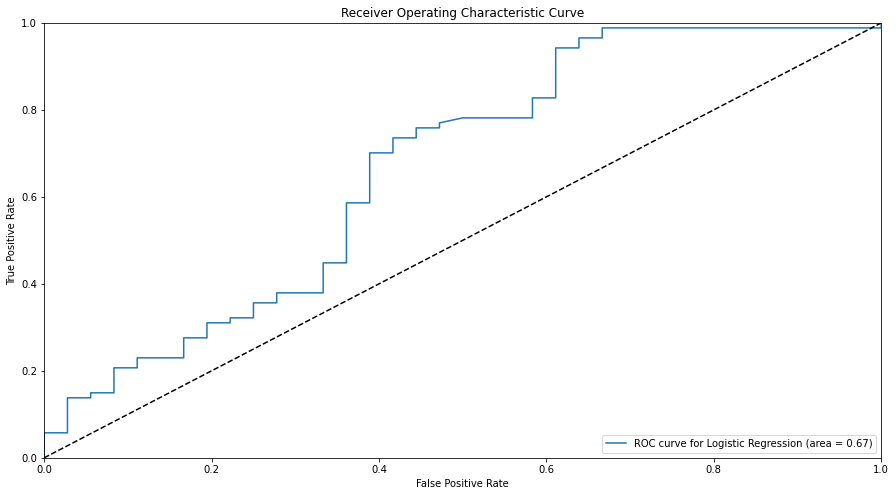

In [133]:
plt.rcParams['figure.figsize'] = [15,8]
plt.clf()
plt.plot(fpr, tpr, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

## 4.3 Prediction for Random Forest Model

In [134]:
test_predictions = rf_model.predict(dftest)

In [135]:
Loan_ID = df_test['Loan_ID']
submission_df_for_RF = pd.DataFrame({
                  "Loan_ID": Loan_ID, 
                  "Loan_Status": test_predictions})

In [136]:
submission_df_for_RF['Loan_Status'].value_counts()

1    250
0    117
Name: Loan_Status, dtype: int64

In [ ]:
submission_df_for_RF['Loan_Status'].replace({1:'Y',
                                        0:'N'},inplace=True)

In [137]:
submission_df_for_RF.to_csv('submission_with_tuned_parameters_in_RF.csv', index=False)